# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information and json
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        id = weather_json['id']
        temp = weather_json['main']['temp']
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        print(f"Processing {city} with city number {id}")
        return id, temp
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)
        
        id = wc[0]
        temp = wc[1]
        #print(wc)
    except:
        print(f"City, {city}, not found. Skipping...")

Processing tezu with city number 1254709
Processing saldanha with city number 3361934
Processing bluff with city number 2206939
Processing bredasdorp with city number 1015776
Processing caravelas with city number 3466980
Processing qaanaaq with city number 3831208
Processing yellowknife with city number 6185377
City, barentsburg, not found. Skipping...
Processing kodinar with city number 1266397
Processing hirara with city number 1862505
Processing chuy with city number 3443061
Processing kahului with city number 5847411
Processing chokurdakh with city number 2126123
Processing cape town with city number 3369157
Processing ushuaia with city number 3833367
Processing hobart with city number 2163355
Processing mayo with city number 4362001
Processing ponta do sol with city number 2264557
City, satitoa, not found. Skipping...
Processing muros with city number 3115824
Processing tessalit with city number 2449893
Processing upernavik with city number 3418910
Processing lebu with city number

Processing ancud with city number 3899695
Processing khatanga with city number 2022572
Processing dalbandin with city number 1180729
Processing vila franca do campo with city number 3372472
Processing beni with city number 219057
Processing ripoll with city number 3111607
City, angra, not found. Skipping...
Processing mizdah with city number 2214827
Processing nikolskoye with city number 546105
Processing garowe with city number 58933
Processing ahipara with city number 2194098
Processing solnechnyy with city number 2016307
Processing beyneu with city number 610298
Processing kabalo with city number 215668
Processing souillac with city number 933995
Processing cienaga with city number 3686279
Processing kiama with city number 2161515
Processing qinzhou with city number 1797551
Processing rush with city number 2961651
Processing san pedro sacatepequez with city number 3589626
Processing kyzyl-suu with city number 1527497
Processing dikson with city number 1507390
Processing rocha with c

Processing carutapera with city number 3402648
Processing pochutla with city number 3517970
Processing katobu with city number 1640972
City, utiroa, not found. Skipping...
Processing zaoyang with city number 1785462
Processing sioux lookout with city number 6148373
Processing beringovskiy with city number 2126710
City, kazalinsk, not found. Skipping...
Processing bhadrachalam with city number 1276328
Processing tilichiki with city number 2120591
Processing port elizabeth with city number 964420
Processing mandalgovi with city number 2030065
Processing quzhou with city number 1797264
Processing kamenka with city number 553766
Processing zemio with city number 235826
City, mrirt, not found. Skipping...
Processing qasigiannguit with city number 3420768
Processing dinguiraye with city number 2421903
Processing havre-saint-pierre with city number 5972291
City, guelengdeng, not found. Skipping...
Processing aranos with city number 3358666
Processing sirohi with city number 1256067
Processing

Processing deniliquin with city number 2169068
City, ngukurr, not found. Skipping...
Processing porbandar with city number 1259395
Processing flinders with city number 6255012
Processing badarwas with city number 1278006
Processing tokur with city number 2015217
Processing coihueco with city number 3894406
Processing kuraymah with city number 371870
Processing yerbogachen with city number 2012956
Processing miyako with city number 2111884
Processing oranjemund with city number 3354071
Processing lavumisa with city number 935051
Processing tura with city number 1254046
Processing atar with city number 2381334
Processing san cristobal with city number 3628473
City, nizhneyansk, not found. Skipping...
Processing spokane with city number 5811704
Processing shimoda with city number 1852357
Processing novovasylivka with city number 699061
Processing maine-soroa with city number 2441447
Processing mangai with city number 2313084
Processing prainha with city number 3391287
Processing perafita 

In [4]:
# Lists to hold data
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

#Loop through weather data
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        city_list.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
        return lon
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)

    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame
weather_dict = {
    'City': city_list,
    'Lat': lat,
    'Lon': lon,
    'Max_Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind_Speed': wind, 
    'Country': country,
    'Date': date
    
}
city_weather_data_df = pd.DataFrame(weather_dict)
city_weather_data_df


,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Tezu,27.92,96.17,79.16,85,100,1.92,IN,1595681505
1,Saldanha,-33.01,17.94,66.20,59,0,9.17,ZA,1595681505
2,Bluff,-46.60,168.33,48.94,82,23,18.59,NZ,1595681506
3,Bredasdorp,-34.53,20.04,71.60,56,0,8.05,ZA,1595681506
4,Caravelas,-17.71,-39.25,73.44,86,100,5.21,BR,1595681506
...,...,...,...,...,...,...,...,...,...
550,Lufilufi,-13.87,-171.60,81.59,72,21,21.97,WS,1595681608
551,Opuwo,-18.06,13.84,77.36,18,0,10.42,NA,1595681608
552,Ndendé,-2.40,11.36,92.73,37,22,2.66,GA,1595681608
553,Magadan,59.57,150.80,51.58,92,14,5.79,RU,1595681609


In [6]:
#Output to CSV
city_weather_data_df.to_csv('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/cities.csv')
    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
find_humidity_outliers = city_weather_data_df[city_weather_data_df['Humidity'] > 100 ].index
#find_humidity_outliers

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_weather_data_df.drop(find_humidity_outliers , inplace=False)
cleaned_city_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Tezu,27.92,96.17,79.16,85,100,1.92,IN,1595681505
1,Saldanha,-33.01,17.94,66.20,59,0,9.17,ZA,1595681505
2,Bluff,-46.60,168.33,48.94,82,23,18.59,NZ,1595681506
3,Bredasdorp,-34.53,20.04,71.60,56,0,8.05,ZA,1595681506
4,Caravelas,-17.71,-39.25,73.44,86,100,5.21,BR,1595681506
...,...,...,...,...,...,...,...,...,...
550,Lufilufi,-13.87,-171.60,81.59,72,21,21.97,WS,1595681608
551,Opuwo,-18.06,13.84,77.36,18,0,10.42,NA,1595681608
552,Ndendé,-2.40,11.36,92.73,37,22,2.66,GA,1595681608
553,Magadan,59.57,150.80,51.58,92,14,5.79,RU,1595681609


In [9]:
# Extract relevant fields from the data frame
cols = [0,1,3,4,5,6]
relevant_city_data_df = cleaned_city_data_df[cleaned_city_data_df.columns[cols]]
relevant_city_data_df 

# Export the City_Data into a csv
relevantcity_output_data_file = "output_data/cities.csv"

relevant_city_data_df 

,City,Lat,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Tezu,27.92,79.16,85,100,1.92
1,Saldanha,-33.01,66.20,59,0,9.17
2,Bluff,-46.60,48.94,82,23,18.59
3,Bredasdorp,-34.53,71.60,56,0,8.05
4,Caravelas,-17.71,73.44,86,100,5.21
...,...,...,...,...,...,...
550,Lufilufi,-13.87,81.59,72,21,21.97
551,Opuwo,-18.06,77.36,18,0,10.42
552,Ndendé,-2.40,92.73,37,22,2.66
553,Magadan,59.57,51.58,92,14,5.79


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

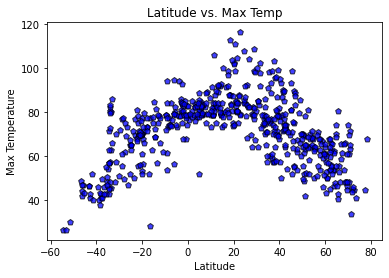

In [11]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Max_Temp"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/max_temp.png')
plt.show()


## Latitude vs. Humidity Plot

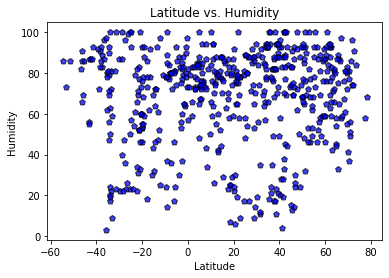

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Humidity"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

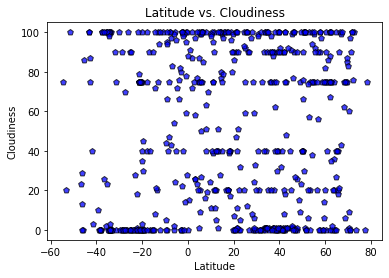

In [13]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

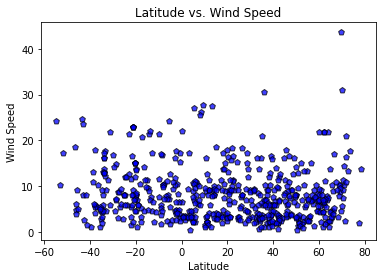

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Wind_Speed"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/wind.png')
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
hemisphere = []
y_values = []
def linearregression(hemisphere): 
    x_axis = hemisphere
    y_axis = y_values 

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(0,40),fontsize=18,color="red")

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] >= 0] 
southern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] <= 0] 


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

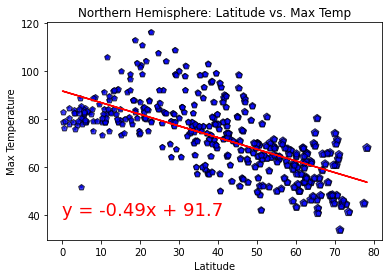

In [17]:
hemisphere = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df ["Max_Temp"]

linearregression(hemisphere)


plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


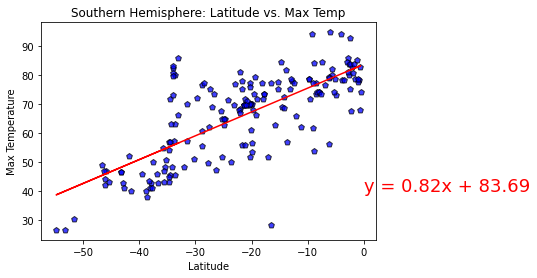

In [18]:
hemisphere = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df ["Max_Temp"]

linearregression(hemisphere)
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

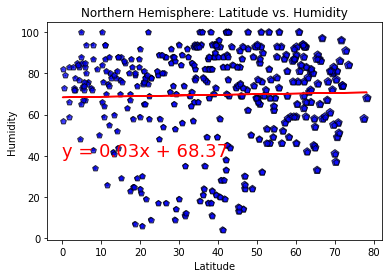

In [19]:
hemisphere = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df ["Humidity"]

linearregression(hemisphere)

plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


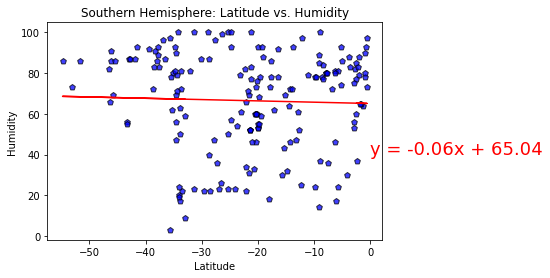

In [20]:
hemisphere = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df ["Humidity"]

linearregression(hemisphere)

plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

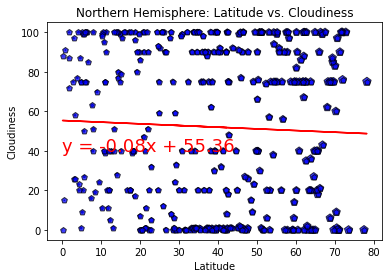

In [21]:
hemisphere = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df ["Cloudiness"]

linearregression(hemisphere)

plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


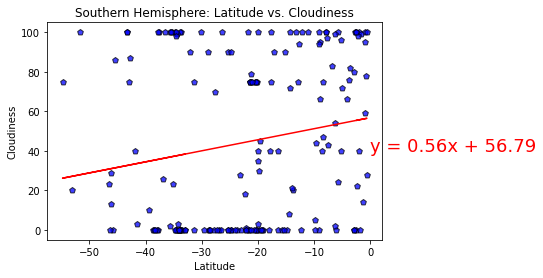

In [22]:
hemisphere = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df ["Cloudiness"]

linearregression(hemisphere)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

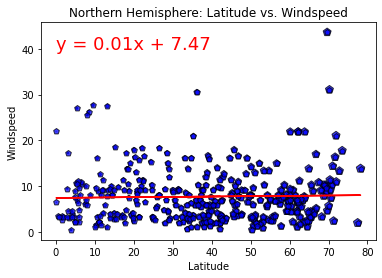

In [24]:
hemisphere = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df ["Wind_Speed"]

linearregression(hemisphere)

plt.title("Northern Hemisphere: Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


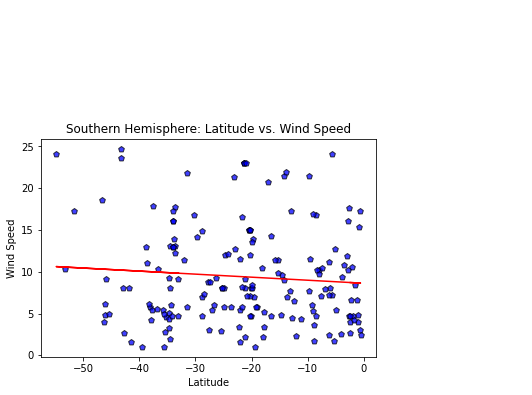

In [25]:
hemisphere = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df ["Wind_Speed"]

linearregression(hemisphere)

plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [ ]:
#Data Analysis: Three Observable Trends
#1) In the scatterplots displaying Max temp vs latitude in the Northern and Southern Hemispheres,
# it is observed that the warmest temperatures are found near the equater (0 degree latitude) 
# and the continue to decrease as you move away from the equator (increasing latitude) in either 
#direction.  This trend is also observed in the Max Temp vs. Latitude Plot (with Northern and 
# Souther hemispheres combined).

#2) In all three of the figures displaying data on Latitude vs. Humidity, it can be observed that 
# the closer a city is to the equator the less likely they are to have low humidity.  However,
# as the cities move away from the equator there appears to be little correlation betwwen latitude 
# and humidity in either hemisphere.

#3)There appears to be no correlation between latitude and cloudiness. 
